<a href="https://colab.research.google.com/github/oThiagoBittencourt/PerceptronBigFivePersonalityTest/blob/main/TesteCincoPersonalidades_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teste Cinco Personalidades (OCEAN)**

## **Aluno:** Thiago Bittencourt Santana

**Link para a base de dados:** [FivePersonalityDB](ttps://www.kaggle.com/tunguz/big-five-personality-test)

### **Sobre o Teste:**
> Este teste de personalidade de 50 perguntas permitirá que você obtenha sua pontuação nas cinco características principais, bem como cruze os resultados com as descobertas da pesquisa em ciências sociais. O teste dos Cinco Grandes é o teste de personalidade mais amplamente usado nas ciências sociais e às vezes é chamado de "o único teste de personalidade verdadeiramente científico". Psicólogos e pesquisadores que o defendem argumentam que os cinco traços funcionam como assinaturas disposicionais que moldam a respostas a estímulos ao longo do tempo, deixando sua marca no comportamento e nas atitudes da pessoa, no desempenho acadêmico, na ideologia política, nos ganhos ao longo da vida e até mesmo na sua saúde e longevidade.


### **Como realizar o teste:**
- Ao iniciar o teste, serão apresentadas 50 perguntas
- Para cada pergunta, utilize valores de 1 à 5 como resposta
- 1 = Discordo, 3 = Neutro, 5 = Concordo

### **Resultados possíveis:**
- Abertura a novas experiências;
- Conscienciosidade;
- Extroversão;
- Neuroticismo;
- Simpatia.

<br>

---

## **Primeira Parte - Clustering**

A base de dados não conta com resultado para cada grupo de respostas dos testes. Por isso, com propósito de estudo: inicialmente, através do scikit-learn, utilizarei um processo de clustering (aprendizado não supervisionado), e atribuirei os resultados a cada linha de entradas do banco de dados.

### **Limpando DataSet**


- Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
pd.options.display.max_columns = 150

- Carregando o DataSet
> Insira o DS na pasta de arquivos!

In [2]:
data = pd.read_csv('/content/FivePersonality.csv', sep='\t')

- Verificando o dataset

In [3]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,9419,5491,3959,4821,5611,2756,2388,2113,5900,4110,6135,4150,5739,6364,3663,5070,5709,4285,2587,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6.0,1.0,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,7235,3598,3315,2564,2976,3050,4787,3228,3465,3309,9036,2406,3484,3359,3061,2539,4226,2962,1799,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11.0,1.0,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,4657,3549,2543,3335,5847,2540,4922,3142,14621,2191,5128,3675,3442,4546,8275,2185,2164,1175,3813,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7.0,1.0,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,3996,2896,5096,4240,5168,5456,4360,4496,5240,4000,3736,4616,3015,2711,3960,4064,4208,2936,7336,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7.0,1.0,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,6004,3965,2721,3706,2968,2426,7339,3302,16819,3731,4740,2856,7461,2179,3324,2255,4308,4506,3127,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17.0,2.0,KE,1.0,38.0


- Excluindo os atributos irrelevantes

In [4]:
data.drop(data.columns[50:], axis=1, inplace=True)

- Verificando a presença do valor 0 como resposta (um problema, afinal, as respostas podem ser apenas entre 1 e 5)

In [5]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Limpando o Dataframe com apenas registros maiores que zero

In [6]:
data = data[(data > 0.00).all(axis=1)]

### **Agrupando os participantes em 5 clusters:**

> Após o tratamento dos dados, será iniciado o processo de treinamento

- Serão gerado 5 clusters ao final do teste
- Os clusters serão devidamente inseridos no banco de dados, como respostas(Y) para o processo de treinamento supervisionado Perceptron (Segunda Parte)

In [7]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)
data['Clusters'] = k_fit.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- Verificando o DataSet, agora com os clusters

In [8]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5,2
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3,3
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4,3
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3,0
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5,2


## **Segunda Parte - Perceptron**

Agora que a base de dados conta com uma coluna de resposta(Y) para cada formulário. Podemos iniciar o teste do perceptron de multi camadas

### **Inicialização**

In [12]:
# Separando o CSV para treinamento e teste
data_fit = data.iloc[1000:,:] # treinamento
data_test = data.iloc[:1000,:] # teste

numEpocas = 300         # Número de épocas.
q = 1000                # Número de padrões treinamento.
q2 = 100                # Número de padrões testes.

eta = 0.04              # Taxa de aprendizado.
m = 50                  # Número de neurônios na camada de entrada.
N = 10                   # Número de neurônios na camada escondida.
L = 1                   # Número de neurônios na camada de saída.

# Carrega os dados de treinamento
EXT = []
EST = []
AGR = []
CSN = []
OPN = []

for i in range(1, 11):
    EXT.append(data_fit[f'EXT{i}'].to_numpy())
    EST.append(data_fit[f'EST{i}'].to_numpy())
    AGR.append(data_fit[f'AGR{i}'].to_numpy())
    CSN.append(data_fit[f'CSN{i}'].to_numpy())
    OPN.append(data_fit[f'OPN{i}'].to_numpy())

# Carrega os dados de teste
EXT_t = []
EST_t = []
AGR_t = []
CSN_t = []
OPN_t = []

for i in range(1, 11):
    EXT_t.append(data_test[f'EXT{i}'].to_numpy())
    EST_t.append(data_test[f'EST{i}'].to_numpy())
    AGR_t.append(data_test[f'AGR{i}'].to_numpy())
    CSN_t.append(data_test[f'CSN{i}'].to_numpy())
    OPN_t.append(data_test[f'OPN{i}'].to_numpy())

# Vetor de classificação desejada.
d = data_fit['Clusters'].to_numpy()
d2 = data_test['Clusters'].to_numpy() # testes

# Inicia aleatoriamente as matrizes de pesos.
# Inicializando com m, N e L nos dá a liberdade de diferentes arquiteturas (só alterando as linhas 17,18 e 19)
W1 = np.random.random((N, m + 1)) #dimensões da Matriz de entrada
W2 = np.random.random((L, N + 1)) #dimensões da Matriz de saída

# Array para amazernar os erros.
E = np.zeros(q)
Etm = np.zeros(numEpocas) #Etm = Erro total médio ==> serve para acompanharmos a evolução do treinamento da rede

# bias
bias = 1

# Entrada do Perceptron.
# concatenação dos 50 vetores para treinamento
X = np.vstack((EXT[0], EXT[1], EXT[2], EXT[3], EXT[4], EXT[5], EXT[6], EXT[7], EXT[8], EXT[9], EST[0], EST[1], EST[2], EST[3], EST[4], EST[5], EST[6], EST[7], EST[8], EST[9], AGR[0], AGR[1], AGR[2], AGR[3], AGR[4], AGR[5], AGR[6], AGR[7], AGR[8], AGR[9], CSN[0], CSN[1], CSN[2], CSN[3], CSN[4], CSN[5], CSN[6], CSN[7], CSN[8], CSN[9], OPN[0], OPN[1], OPN[2], OPN[3], OPN[4], OPN[5], OPN[6], OPN[7], OPN[8], OPN[9]))
# concatenação dos 50 vetetores para teste
X_t = np.vstack((EXT_t[0], EXT_t[1], EXT_t[2], EXT_t[3], EXT_t[4], EXT_t[5], EXT_t[6], EXT_t[7], EXT_t[8], EXT_t[9], EST_t[0], EST_t[1], EST_t[2], EST_t[3], EST_t[4], EST_t[5], EST_t[6], EST_t[7], EST_t[8], EST_t[9], AGR_t[0], AGR_t[1], AGR_t[2], AGR_t[3], AGR_t[4], AGR_t[5], AGR_t[6], AGR_t[7], AGR_t[8], AGR_t[9], CSN_t[0], CSN_t[1], CSN_t[2], CSN_t[3], CSN_t[4], CSN_t[5], CSN_t[6], CSN_t[7], CSN_t[8], CSN_t[9], OPN_t[0], OPN_t[1], OPN_t[2], OPN_t[3], OPN_t[4], OPN_t[5], OPN_t[6], OPN_t[7], OPN_t[8], OPN_t[9]))


### **Treinamento**

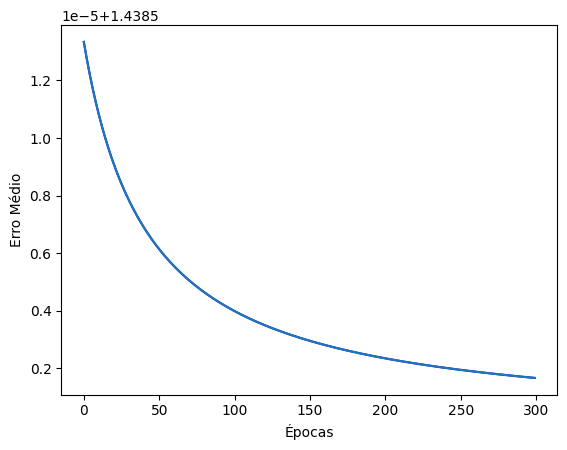

In [13]:
# Para testes com função ativação sigmoid
def sigmoid(X):
   return 1/(1+np.exp(-X))

# Inicialização do Treinamento
for i in range(numEpocas): #repete o numero de vezes terminado, no caso 20
    for j in range(q): #repete o numero de "dados" existentes (nesse exemplo 13)

        # Insere o bias no vetor de entrada (apresentação do padrão da rede)
        Xb = np.hstack((bias, X[:,j])) #empilhamos pelo hstack junto ao bias e ficamos
                                       #com unico vetor [bias peso PH]

        # Saída da Camada Escondida.
        o1 = np.tanh(W1.dot(Xb))            # Equações (1) e (2) juntas.
                                            # (W1.dot(Xb))
                                            # np.tanh  ==> tangente hiperbólica
                                            # Geremos o vetor o1 = saida da camada intermediária

        # Incluindo o bias. Saída da camada escondida é a entrada da camada
        # de saída.
        o1b = np.insert(o1, 0, bias)

        # Neural network output
        Y = np.tanh(W2.dot(o1b))            # Equações (3) e (4) juntas.
                                            #Resulta na saída da rede neural

        #Y = sigmoid(W2.dot(o1b))           # para testes com sigmoid

        e = d[j] - Y                        # Equação (5).

        # Erro Total.
        E[j] = (e.transpose().dot(e))/2     # Equação de erro quadrática.

        # Imprime o número da época e o Erro Total.
        # print('i = ' + str(i) + '   E = ' + str(E))

        # Error backpropagation.
        # Cálculo do gradiente na camada de saída.
        delta2 = np.diag(e).dot((1 - Y*Y))          # Eq. (6)
        vdelta2 = (W2.transpose()).dot(delta2)      # Eq. (7)
        delta1 = np.diag(1 - o1b*o1b).dot(vdelta2)  # Eq. (8)

        # Atualização dos pesos.
        W1 = W1 + eta*(np.outer(delta1[1:], Xb))
        W2 = W2 + eta*(np.outer(delta2, o1b))

    #Calculo da média dos erros
    Etm[i] = E.mean()

plt.xlabel("Épocas")
plt.ylabel("Erro Médio")
plt.plot(Etm, color='b')
plt.plot(Etm)
plt.show()

### **Teste**

In [14]:
Error_Test = np.zeros(q2)

for i in range(q2):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X_t[:,i]))

    # Saída da Camada Escondida.
    o1 = np.tanh(W1.dot(Xb))            # Equações (1) e (2) juntas.
    #print(o1)

    # Incluindo o bias. Saída da camada escondida é a entrada da camada
    # de saída.
    o1b = np.insert(o1, 0, bias)

    # Neural network output
    Y = np.tanh(W2.dot(o1b))            # Equações (3) e (4) juntas.
    # Y = sigmoid(W2.dot(o1b))          # para testes com sigmoid
    print(Y)

    Error_Test[i] = d2[i] - (Y) + 1 # acrescentando +1 pois os indices de resposta começam em zero, e os clusters do DataSet são de 0 a 4

print(Error_Test)
print(np.round(Error_Test) - d2[:q2]) #aqui se ela acertou todas o vetor tem que estar zerado

[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]
[0.99999842]